Used dataset  : https://www.kaggle.com/datasets/volkanastasia/dataset-of-used-cars?resource=download

# **Problem statement**

The problem we aim to address with this EDA project is to identify the key factors that influence the price of used cars and explore the relationships between these factors

# **Objective**

**The objective of this Exploratory Data Analysis (EDA) project is to gain a comprehensive understanding of the used car market by analyzing the provided dataset.** This will be achieved by:

  1. **Identifying and visualizing the distributions of key features**: We will analyze the distributions of features such as brand, model, year, mileage, condition, and location to understand the composition of the used car market.
  2. **Investigating the relationships between features and price**: We will use statistical methods and visualizations to explore the correlations between different features and the price of used cars. This will help us identify the key factors that influence pricing.
  3. **Discovering patterns and trends**: We will look for patterns and trends in the data to gain insights into the dynamics of the used car market, such as price fluctuations over time or regional variations.
  4. **Identifying outliers and anomalies**: We will detect any outliers or anomalies in the data that may require further investigation or cleaning.
  5. **Deriving actionable insights**: Based on the findings, we will derive actionable insights that can be valuable for both buyers and sellers in the used car market. This could include identifying car characteristics that make them more or less expensive or understanding regional price variations.

**Ultimately, this EDA project aims to empower stakeholders in the used car market with data-driven insights to make informed decisions**. By uncovering the hidden patterns and relationships within the data, we can contribute to a better understanding of this complex market.

# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data set

In [ ]:
df = pd.read_csv('car_data.csv')
df

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


**Independent Variables:**

Based on the columns typically present in used car datasets, here are the likely independent variables in 'car_data.csv':

- **Car_Name**: This represents the make and model of the car and can be treated as a categorical variable. You might consider splitting it into separate 'Brand' and 'Model' columns for more granular analysis.
- **Year**: The year the car was manufactured. This is a numerical variable representing the age of the car.
- **Selling_Price**: The price at which the car was sold (our target variable).
- **Present_Price**: The current market price of the car. This could be a useful independent variable to compare with the selling price.
- **Kms_Driven**: The total distance the car has been driven, similar to 'Mileage' in the general description. This is a continuous numerical variable.
- **Fuel_Type**: The type of fuel the car uses (e.g., Petrol, Diesel, CNG). This is a categorical variable.
- **Seller_Type**: Whether the seller is an individual or a dealer. This is a categorical variable.
- Transmission: The type of transmission (e.g., Manual, Automatic). This is a categorical variable.
- **Owner**: The number of previous owners the car has had. This is a numerical variable.


**Target Variable:**

- **Selling_Price**: This column represents the price at which the used car was sold and will be our target variable.

# Basic understanding

In [ ]:
df.shape
print('The number of rows in this dataset is ',df.shape[0],' and columns are ',df.shape[1])

The number of rows in this dataset is  42089  and columns are  13


In [ ]:
df.columns

Index(['Unnamed: 0', 'car_brand', 'car_model', 'car_price', 'car_city',
       'car_fuel', 'car_transmission', 'car_drive', 'car_mileage',
       'car_country', 'car_engine_capacity', 'car_engine_hp', 'car_age'],
      dtype='object')

In [ ]:
df.sample(5)

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
15059,15059,Chevrolet,Niva,928000,Krasnoyarsk,gasoline,manual,4WD,89000,USA,1.7,80,8
29063,29063,Toyota,Camry,2745000,Surgut,gasoline,automatic,FWD,194240,JP,3.5,249,5
25196,25196,Volvo,XC90,2839000,Rostov-on-Don,diesel,automatic,4WD,259314,SE,2.0,225,9
14610,14610,Kia,Rio X (X-Line),1748000,Krasnoyarsk,gasoline,automatic,FWD,81000,KR,1.6,123,7
29230,29230,Kia,Picanto,1000000,Surgut,gasoline,automatic,FWD,205000,KR,1.2,85,11


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
car_brand,object
car_model,object
car_price,int64
car_city,object
car_fuel,object
car_transmission,object
car_drive,object
car_mileage,int64
car_country,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42089 non-null  int64  
 1   car_brand            42089 non-null  object 
 2   car_model            42089 non-null  object 
 3   car_price            42089 non-null  int64  
 4   car_city             42089 non-null  object 
 5   car_fuel             42089 non-null  object 
 6   car_transmission     42089 non-null  object 
 7   car_drive            42089 non-null  object 
 8   car_mileage          42089 non-null  int64  
 9   car_country          42089 non-null  object 
 10  car_engine_capacity  42089 non-null  float64
 11  car_engine_hp        42089 non-null  int64  
 12  car_age              42089 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 4.2+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
car_brand,0
car_model,0
car_price,0
car_city,0
car_fuel,0
car_transmission,0
car_drive,0
car_mileage,0
car_country,0


In [ ]:
df.describe()

,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


# Basic Visualization

visulaization is used to check whether it has skewness or not.

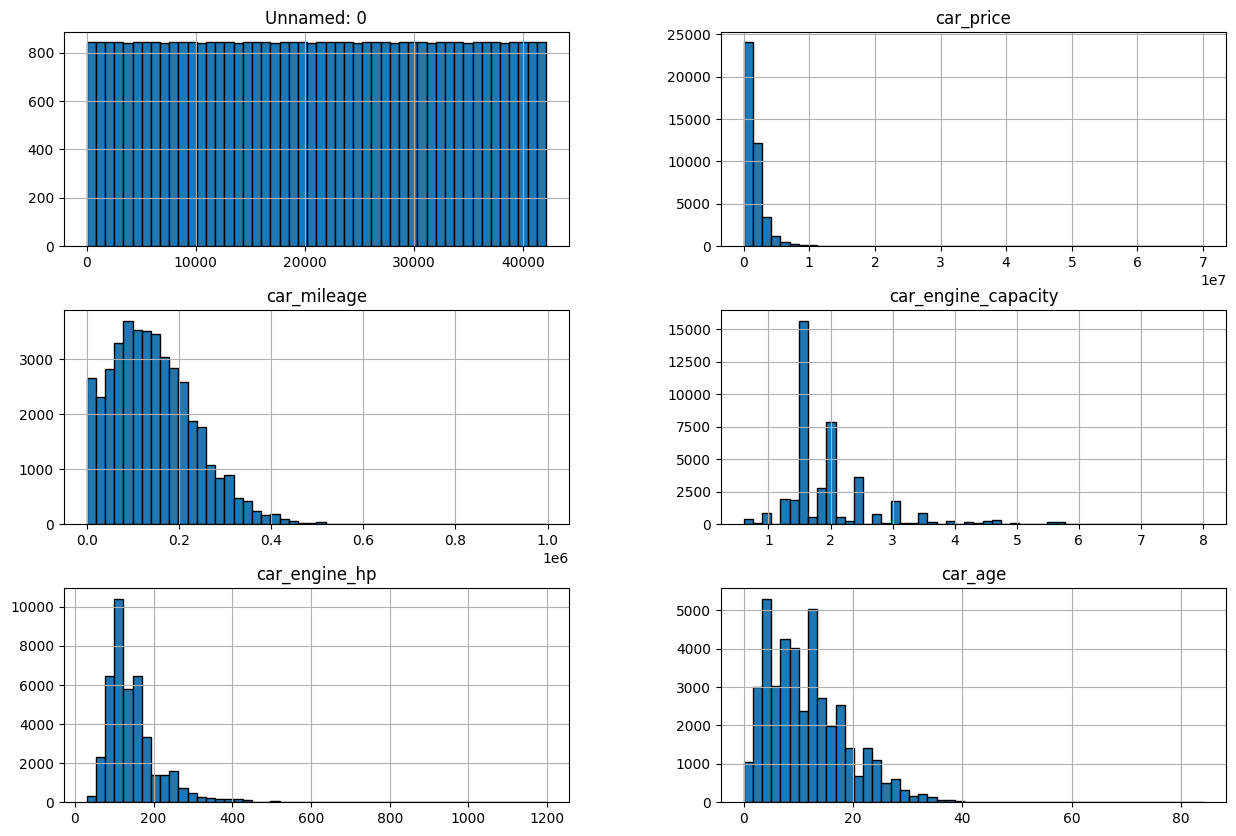

In [ ]:
df.hist(figsize=(15,10),edgecolor = 'k',bins = 50)
plt.show()

# Data Cleaning

In [ ]:
df.sample(5)

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
21998,21998,Toyota,Camry,2499000,Novosibirsk,gasoline,automatic,FWD,151803,JP,2.5,206,6
32690,32690,Nissan,NV200,1675000,Tomsk,gasoline,automatic,FWD,114000,JP,1.6,109,6
21211,21211,Lada,Vesta Cross,1150000,Samara,gasoline,manual,FWD,85000,RUS,1.8,122,6
19865,19865,Kia,Cerato,999000,Nizhny Novgorod,gasoline,automatic,FWD,188090,KR,1.6,126,14
29284,29284,Kia,Sportage,1990000,Surgut,gasoline,automatic,FWD,108500,KR,2.0,150,6


Labelencoding is used to change all the categorical datas to numerical data for a better calculation .

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['car_brand'] = labelencoder.fit_transform(df['car_brand'])
df['car_model'] = labelencoder.fit_transform(df['car_model'])
df['car_city'] = labelencoder.fit_transform(df['car_city'])
df['car_fuel'] = labelencoder.fit_transform(df['car_fuel'])
df['car_fuel'] = labelencoder.fit_transform(df['car_fuel'])
df['car_transmission'] = labelencoder.fit_transform(df['car_transmission'])
df['car_country'] = labelencoder.fit_transform(df['car_country'])

df['car_drive'] = df['car_drive'].replace({'FWD':1 ,'RWD':2, '4WD': 3})

<ipython-input-645-637e9d0df5fa>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['car_drive'] = df['car_drive'].replace({'FWD':1 ,'RWD':2, '4WD': 3})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42089 non-null  int64  
 1   car_brand            42089 non-null  int64  
 2   car_model            42089 non-null  int64  
 3   car_price            42089 non-null  int64  
 4   car_city             42089 non-null  int64  
 5   car_fuel             42089 non-null  int64  
 6   car_transmission     42089 non-null  int64  
 7   car_drive            42089 non-null  int64  
 8   car_mileage          42089 non-null  int64  
 9   car_country          42089 non-null  int64  
 10  car_engine_capacity  42089 non-null  float64
 11  car_engine_hp        42089 non-null  int64  
 12  car_age              42089 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.2 MB


# Data Correlation

Checking coreelation to select the data that are needed for further calculation and for better modeling.

In [ ]:
df_corr = df.corr()
df_corr

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
Unnamed: 0,1.000000,0.083726,0.068101,-0.010289,0.283511,0.026828,-0.040090,0.006265,-0.007998,0.021031,0.019529,-0.005932,-0.018410
car_brand,0.083726,1.000000,0.032998,-0.059802,-0.067648,0.064121,-0.201154,-0.006934,0.129816,-0.095416,0.013930,-0.104286,0.146238
car_model,0.068101,0.032998,1.000000,0.098695,0.011056,-0.045199,-0.106932,0.070289,-0.110373,-0.038294,0.022333,0.064670,-0.223003
car_price,-0.010289,-0.059802,0.098695,1.000000,0.012983,-0.172521,-0.102614,0.371629,-0.349092,-0.187577,0.438152,0.627471,-0.424384
car_city,0.283511,-0.067648,0.011056,0.012983,1.000000,-0.058191,0.126841,-0.010197,-0.055837,-0.021214,-0.004339,0.003933,-0.105688
car_fuel,0.026828,0.064121,-0.045199,-0.172521,-0.058191,1.000000,-0.114941,-0.275312,-0.057858,0.050182,-0.224795,-0.175325,-0.024408
car_transmission,-0.040090,-0.201154,-0.106932,-0.102614,0.126841,-0.114941,1.000000,-0.076590,0.033695,-0.030534,-0.094892,-0.094380,0.045040
car_drive,0.006265,-0.006934,0.070289,0.371629,-0.010197,-0.275312,-0.076590,1.000000,-0.004576,-0.099458,0.541006,0.526245,0.002698
car_mileage,-0.007998,0.129816,-0.110373,-0.349092,-0.055837,-0.057858,0.033695,-0.004576,1.000000,0.088661,0.134040,-0.034815,0.636582
car_country,0.021031,-0.095416,-0.038294,-0.187577,-0.021214,0.050182,-0.030534,-0.099458,0.088661,1.000000,-0.018924,-0.205650,0.156590


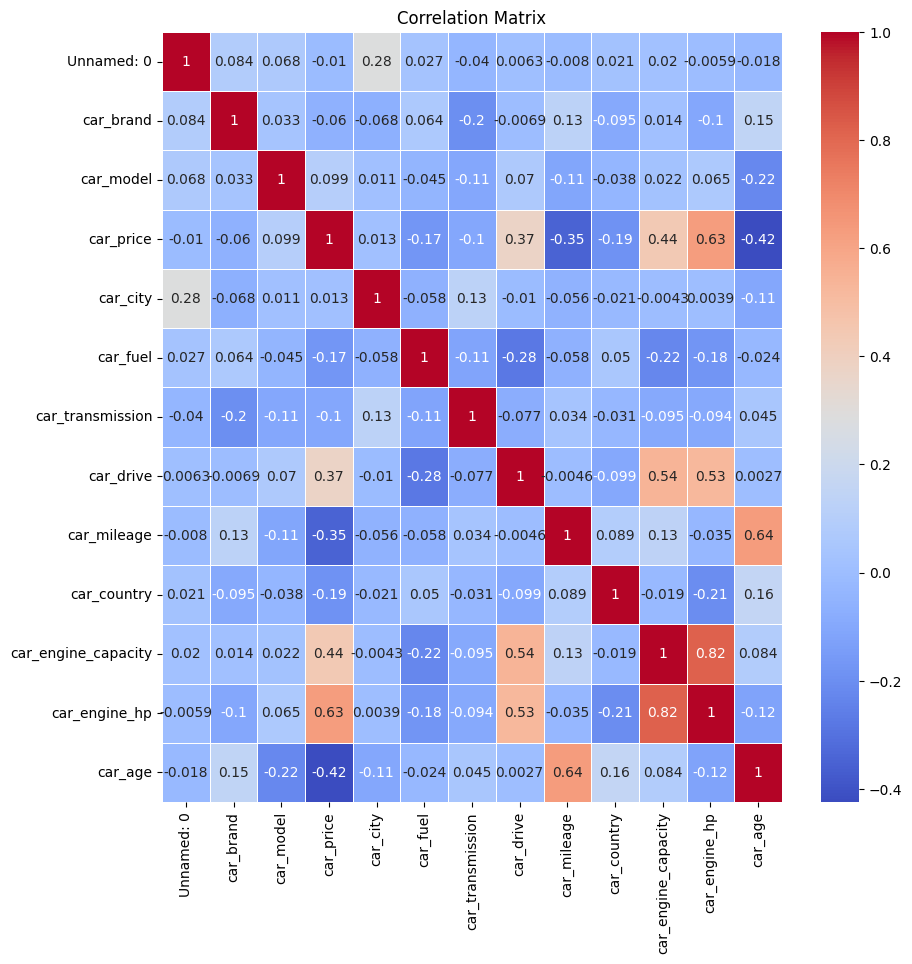

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df_corr,annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
price_corr = df.corr()['car_price']
price_corr

,car_price
Unnamed: 0,-0.010289
car_brand,-0.059802
car_model,0.098695
car_price,1.000000
car_city,0.012983
car_fuel,-0.172521
car_transmission,-0.102614
car_drive,0.371629
car_mileage,-0.349092
car_country,-0.187577


In [ ]:
price_corr = price_corr.sort_values(ascending = False)
price_corr

,car_price
car_price,1.000000
car_engine_hp,0.627471
car_engine_capacity,0.438152
car_drive,0.371629
car_model,0.098695
car_city,0.012983
Unnamed: 0,-0.010289
car_brand,-0.059802
car_transmission,-0.102614
car_fuel,-0.172521


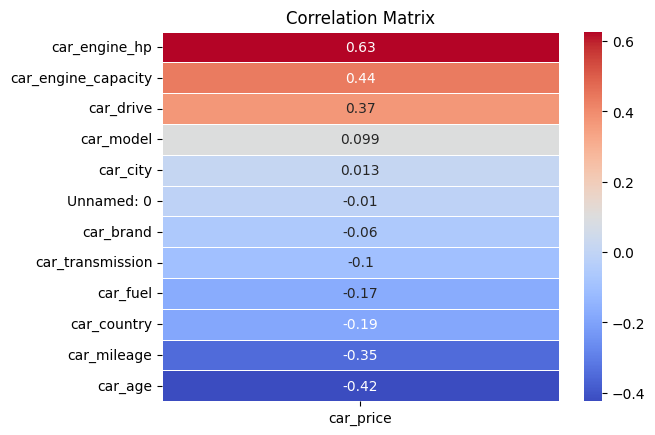

In [ ]:
price_corr = price_corr.drop('car_price')
sns.heatmap(price_corr.to_frame(),annot = True, cmap = 'coolwarm', linewidth = 0.5, annot_kws={'size':10})
plt.title('Correlation Matrix')
plt.show()

taking values with more correlation than |.3|

So, Taking  **'car_age', 'car_mileage', 'car_drive', 'car_engine_capacity', 'car_engine_hp'**

In [ ]:
df = df[['car_age', 'car_mileage', 'car_drive', 'car_engine_capacity', 'car_engine_hp', 'car_price']]
df

,car_age,car_mileage,car_drive,car_engine_capacity,car_engine_hp,car_price
0,14,300000,1,1.8,125,550000
1,10,88000,1,1.6,156,1820000
2,2,19000,3,1.5,150,2600000
3,2,30000,1,3.5,249,4200000
4,2,18824,1,1.5,147,2125000
...,...,...,...,...,...,...
42084,30,183212,3,3.1,125,450000
42085,13,110000,1,1.5,110,650000
42086,13,153000,3,1.5,109,1350000
42087,23,190000,3,2.0,129,550000


<Axes: >

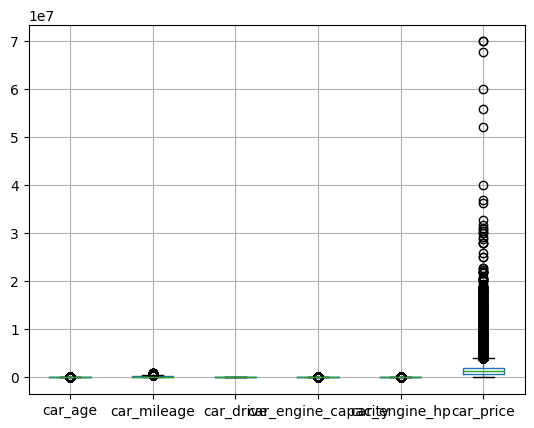

In [ ]:
df.boxplot()

# Data skewness

All the features are having skewness so we have to remove the skewness inorder to get better data modeling.

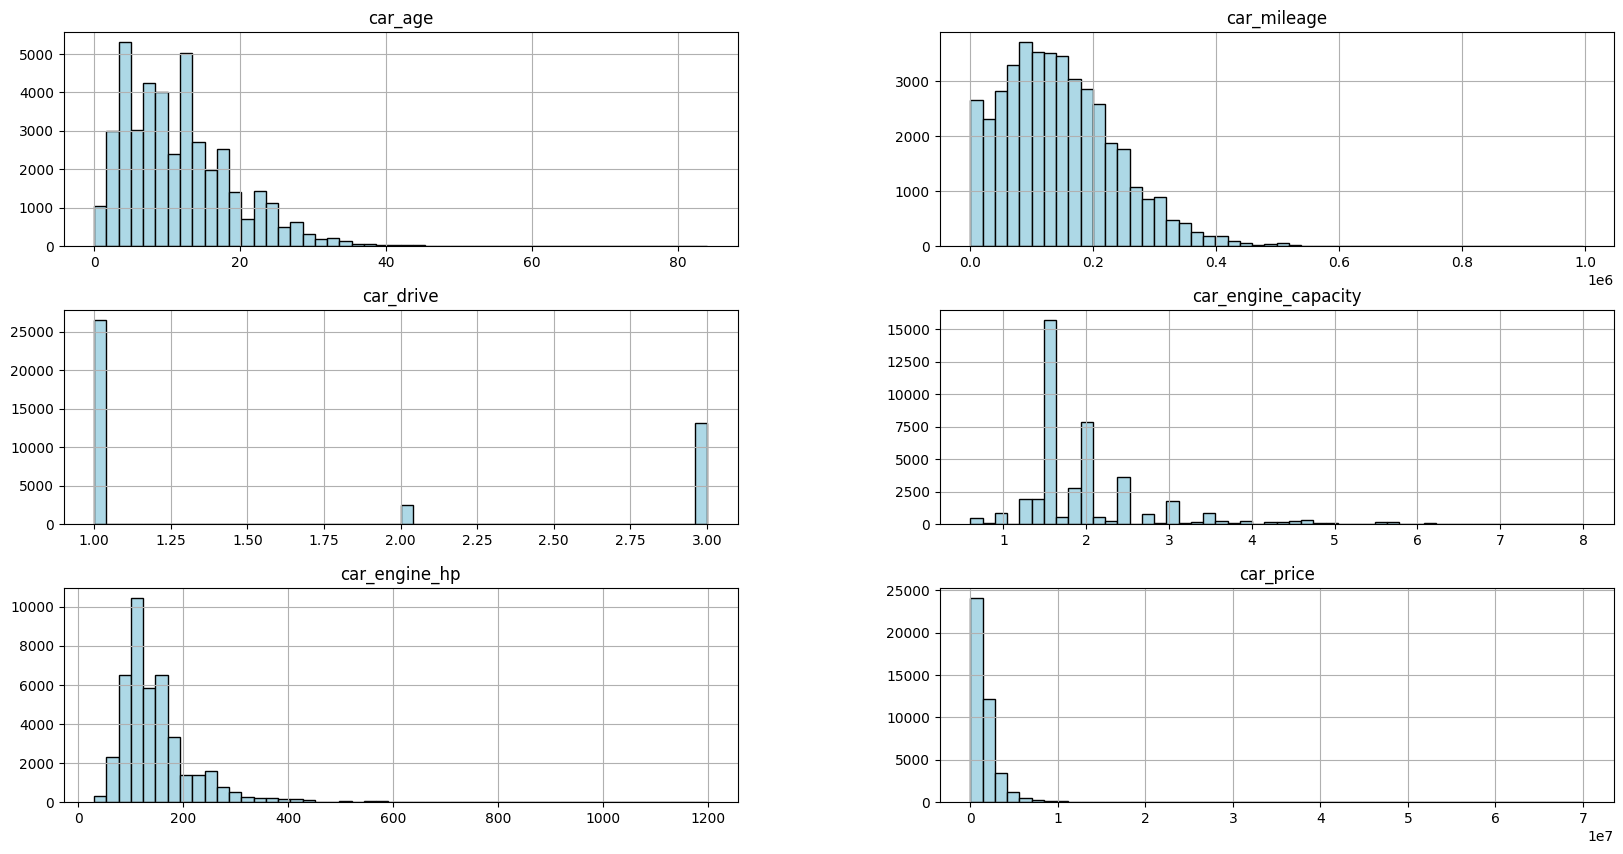

In [ ]:
df.hist(color='lightblue',edgecolor='black',figsize=(20,10),bins=50)
plt.show()

removing skewness.

In [ ]:
df['car_age'] = np.log1p(df['car_age'])
df['car_mileage'] = np.log1p(df['car_mileage'])
df['car_engine_capacity'] = np.log1p(df['car_engine_capacity'])
df['car_engine_hp'] = np.log1p(df['car_engine_hp'])
df['car_price'] = np.log1p(df['car_price'])

<ipython-input-655-0cc10cda5d10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_age'] = np.log1p(df['car_age'])
<ipython-input-655-0cc10cda5d10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_mileage'] = np.log1p(df['car_mileage'])
<ipython-input-655-0cc10cda5d10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

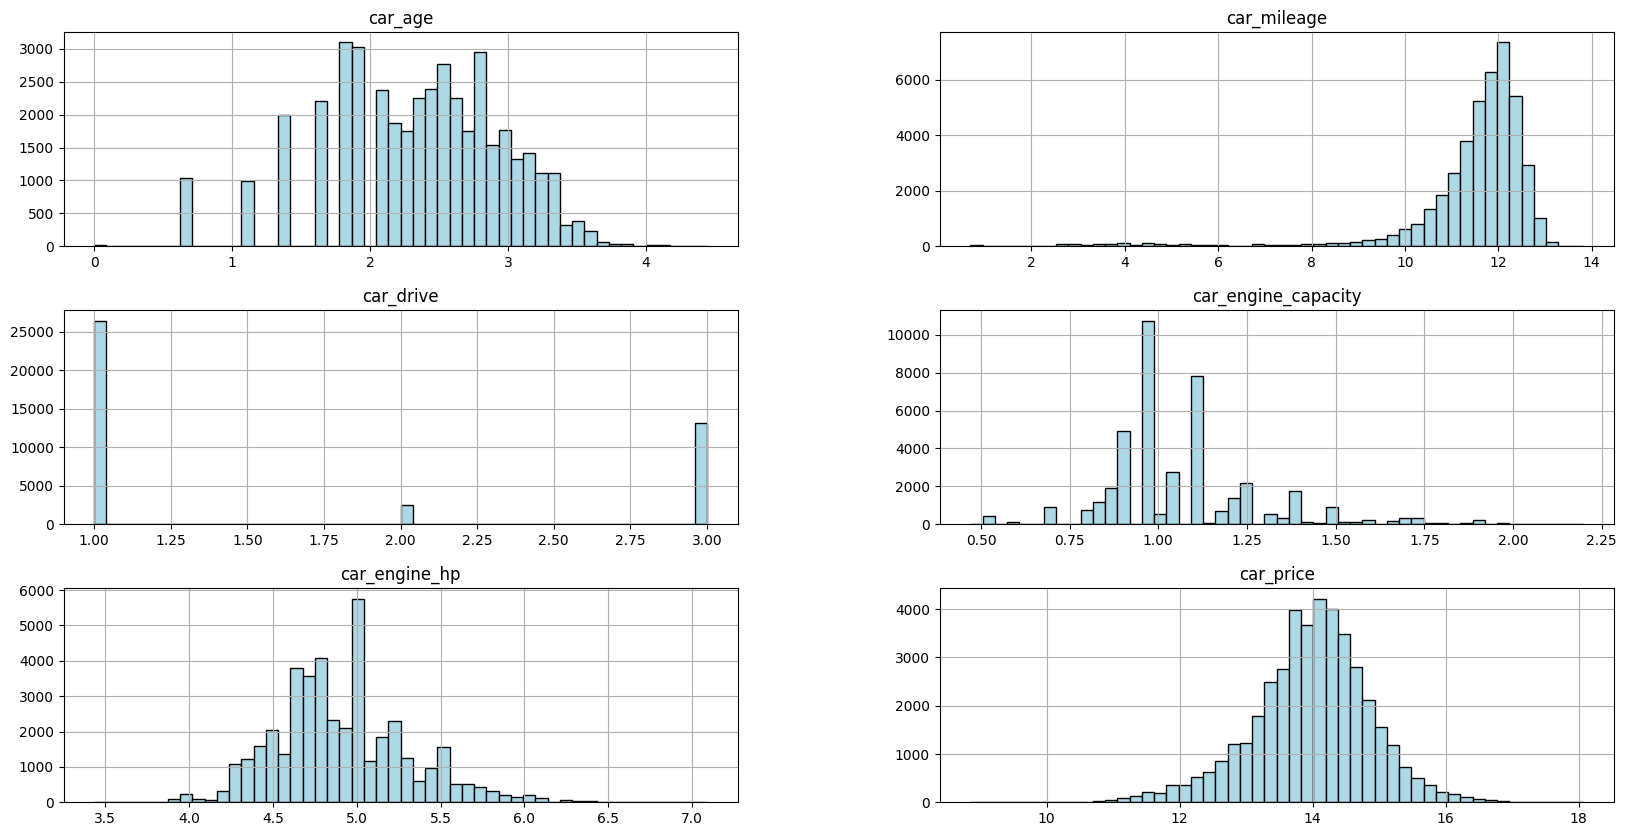

In [ ]:
df.hist(color='lightblue',edgecolor='black',figsize=(20,10),bins=50)
plt.show()

In [ ]:
df1=df
df1

,car_age,car_mileage,car_drive,car_engine_capacity,car_engine_hp,car_price
0,2.708050,12.611541,1,1.029619,4.836282,13.217675
1,2.397895,11.385103,1,0.955511,5.056246,14.414348
2,1.098612,9.852247,3,0.916291,5.017280,14.771022
3,1.098612,10.308986,1,1.504077,5.521461,15.250595
4,1.098612,9.842941,1,0.916291,4.997212,14.569283
...,...,...,...,...,...,...
42084,3.433987,12.118405,3,1.410987,4.836282,13.017005
42085,2.639057,11.608245,1,0.916291,4.709530,13.384729
42086,2.639057,11.938200,3,0.916291,4.700480,14.115616
42087,3.178054,12.154785,3,1.098612,4.867534,13.217675


# **Dimensionality Reduction**
To reduce overfitting and accurating the data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming your dataFrame is called 'df'
# Select the features you want to standardize
features=['car_age', 'car_mileage', 'car_drive', 'car_engine_capacity', 'car_engine_hp']

# Standardize the features
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[features])

#Apply PCA
pca=PCA(n_components=2)  # Choose the desired number of components
principal_components=pca.fit_transform(scaled_data)

# Add the principal components to your DataFrame (Optional)
df['pca1']=principal_components[:,0]
df['pca2']=principal_components[:,1]

<ipython-input-658-e6c95fb80b33>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca1']=principal_components[:,0]
<ipython-input-658-e6c95fb80b33>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca2']=principal_components[:,1]


In [ ]:
df

,car_age,car_mileage,car_drive,car_engine_capacity,car_engine_hp,car_price,pca1,pca2
0,2.708050,12.611541,1,1.029619,4.836282,13.217675,-0.716676,0.853198
1,2.397895,11.385103,1,0.955511,5.056246,14.414348,-0.453419,-0.129244
2,1.098612,9.852247,3,0.916291,5.017280,14.771022,0.797891,-2.192756
3,1.098612,10.308986,1,1.504077,5.521461,15.250595,1.989724,-1.644506
4,1.098612,9.842941,1,0.916291,4.997212,14.569283,-0.346760,-2.325639
...,...,...,...,...,...,...,...,...
42084,3.433987,12.118405,3,1.410987,4.836282,13.017005,1.333595,1.858116
42085,2.639057,11.608245,1,0.916291,4.709530,13.384729,-1.137400,0.215863
42086,2.639057,11.938200,3,0.916291,4.700480,14.115616,-0.057415,0.499969
42087,3.178054,12.154785,3,1.098612,4.867534,13.217675,0.585226,1.342528


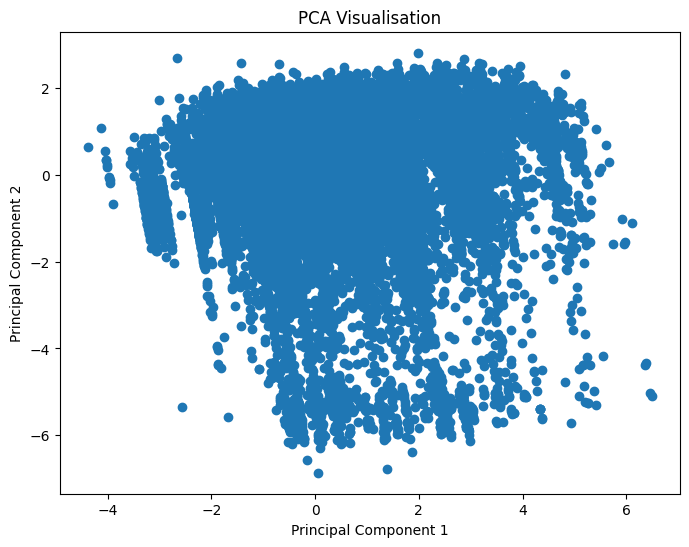

In [ ]:
# Assuming you have a DataFrame 'df' with 'pca1' and 'pca2' columns

plt.figure(figsize=(8,6))
plt.scatter(df['pca1'],df['pca2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualisation')
plt.show()

# Data Scaling and Model Creation

### Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
features = df.drop('car_price', axis=1)

scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(features)

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns, index=features.index)

# You can now use 'scaled_df' for further analysis or modeling
scaled_df

,car_age,car_mileage,car_drive,car_engine_capacity,car_engine_hp,pca1,pca2
0,0.549292,0.780733,-0.745176,-0.151821,-0.196274,-0.472398,0.674542
1,0.056167,-0.053232,-0.745176,-0.483767,0.356939,-0.298872,-0.102181
2,-2.009605,-1.095558,1.437634,-0.659445,0.258939,0.525931,-1.733601
3,-2.009605,-0.784980,-0.745176,1.973383,1.526962,1.311529,-1.300153
4,-2.009605,-1.101885,-0.745176,-0.659445,0.208469,-0.228567,-1.838659
...,...,...,...,...,...,...,...
42084,1.703483,0.445405,1.437634,1.556410,-0.196274,0.879041,1.469034
42085,0.439598,0.098502,-0.745176,-0.659445,-0.515056,-0.749719,0.170662
42086,0.439598,0.322868,1.437634,-0.659445,-0.537816,-0.037845,0.395277
42087,1.296566,0.470143,1.437634,0.157214,-0.117673,0.385753,1.061408


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df['car_price']
# X = data.drop('AQI', axis = 1)
X  = scaled_df

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

model  = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared error :{mse}')
print(f'R-Squared error    :{r2}')

Mean Squared error :0.18660558474162664
R-Squared error    :0.760217313921227


### MinMax scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = df1.drop('car_price', axis=1)

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(features)

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns, index=features.index)

# You can now use 'scaled_df' for further analysis or modeling
scaled_df

,car_age,car_mileage,car_drive,car_engine_capacity,car_engine_hp,pca1,pca2
0,0.609557,0.908482,0.0,0.323998,0.383725,0.337046,0.796815
1,0.539744,0.814997,0.0,0.281092,0.443917,0.361271,0.695416
2,0.247288,0.698154,1.0,0.258384,0.433254,0.476418,0.482439
3,0.247288,0.732969,0.0,0.598692,0.571219,0.586092,0.539024
4,0.247288,0.697445,0.0,0.258384,0.427763,0.371086,0.468724
...,...,...,...,...,...,...,...
42084,0.772959,0.870893,1.0,0.544796,0.383725,0.525714,0.900533
42085,0.594028,0.832006,0.0,0.258384,0.349041,0.298330,0.731035
42086,0.594028,0.857157,1.0,0.258384,0.346565,0.397712,0.760358
42087,0.715351,0.873666,1.0,0.363942,0.392277,0.456848,0.847319


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df['car_price']
# X = data.drop('AQI', axis = 1)
X  = scaled_df

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

model  = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared error :{mse}')
print(f'R-Squared error    :{r2}')

Mean Squared error :0.1866055847416266
R-Squared error    :0.760217313921227


low r2 and high MSE

# non scaled prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df1['car_price']
# X = data.drop('AQI', axis = 1)
X  = df1.drop('car_price',axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

model  = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared error :{mse}')
print(f'R-Squared error    :{r2}')

Mean Squared error :0.18660558474162658
R-Squared error    :0.7602173139212272


low r2 and high MSE

# pca prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df1['car_price']
# X = data.drop('AQI', axis = 1)
X  = df[['pca1','pca2']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

model  = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared error :{mse}')
print(f'R-Squared error    :{r2}')

Mean Squared error :0.3002856931883484
R-Squared error    :0.6141417192662053


This prediction cannot be used because it has less R2 score than other values.

# Best Model which get the most R2 and low MSE

In [ ]:
df1

,car_age,car_mileage,car_drive,car_engine_capacity,car_engine_hp,car_price,pca1,pca2
0,2.708050,12.611541,1,1.029619,4.836282,13.217675,-0.716676,0.853198
1,2.397895,11.385103,1,0.955511,5.056246,14.414348,-0.453419,-0.129244
2,1.098612,9.852247,3,0.916291,5.017280,14.771022,0.797891,-2.192756
3,1.098612,10.308986,1,1.504077,5.521461,15.250595,1.989724,-1.644506
4,1.098612,9.842941,1,0.916291,4.997212,14.569283,-0.346760,-2.325639
...,...,...,...,...,...,...,...,...
42084,3.433987,12.118405,3,1.410987,4.836282,13.017005,1.333595,1.858116
42085,2.639057,11.608245,1,0.916291,4.709530,13.384729,-1.137400,0.215863
42086,2.639057,11.938200,3,0.916291,4.700480,14.115616,-0.057415,0.499969
42087,3.178054,12.154785,3,1.098612,4.867534,13.217675,0.585226,1.342528


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y = df1['car_price']
# X = data.drop('AQI', axis = 1)
X  = df1.drop(['car_price','pca1','pca2'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

model  = RandomForestRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared error :{mse}')
print(f'R-Squared error    :{r2}')

Mean Squared error :0.0784117969000879
R-Squared error    :0.8992431480172517


In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with price': df.corr()['car_price'].sort_values(ascending=False),
    'R2 value':r2,
    'MSE value':mse
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling
final_df = df[['car_age', 'car_mileage', 'car_drive', 'car_engine_capacity', 'car_engine_hp',"car_price"]]
final_df

EDA Summary:
Dataset Shape: (42089, 8)
Missing Values: 0
Correlation with price: car_price              1.000000
car_engine_hp          0.654284
pca1                   0.624195
car_engine_capacity    0.434141
car_drive              0.381287
car_mileage           -0.347507
pca2                  -0.480187
car_age               -0.664865
Name: car_price, dtype: float64
R2 value: 0.8992431480172517
MSE value: 0.0784117969000879


,car_age,car_mileage,car_drive,car_engine_capacity,car_engine_hp,car_price
0,2.708050,12.611541,1,1.029619,4.836282,13.217675
1,2.397895,11.385103,1,0.955511,5.056246,14.414348
2,1.098612,9.852247,3,0.916291,5.017280,14.771022
3,1.098612,10.308986,1,1.504077,5.521461,15.250595
4,1.098612,9.842941,1,0.916291,4.997212,14.569283
...,...,...,...,...,...,...
42084,3.433987,12.118405,3,1.410987,4.836282,13.017005
42085,2.639057,11.608245,1,0.916291,4.709530,13.384729
42086,2.639057,11.938200,3,0.916291,4.700480,14.115616
42087,3.178054,12.154785,3,1.098612,4.867534,13.217675


# Exporting the model


In [ ]:
df1.sample()

,car_age,car_mileage,car_drive,car_engine_capacity,car_engine_hp,car_price,pca1,pca2
28407,1.791759,11.049445,1,0.955511,4.634729,14.074022,-0.97854,-0.954176


In [ ]:
# Take user input for new dtaa PM2.5, Radio, Newspaper
car_age = float(input('Enter car_age: '))
car_mileage = float(input('Enter car_mileage: '))
car_drive = float(input('Enter car_drive: '))
car_engine_capacity = float(input('Enter car_engine_capacity: '))
car_engine_hp = float(input('Enter car_engine_hp: '))

# Create a NUmpy Array with the user input
user_input = [[car_age, car_mileage, car_drive, car_engine_capacity, car_engine_hp]]

# Make a prediction using the trained model
AQI = model.predict(user_input)
print(f'The predicted AQI :{AQI}')

Enter car_age: 1.791759
Enter car_mileage: 11.049445
Enter car_drive: 1
Enter car_engine_capacity: 0.955511
Enter car_engine_hp: 4.634729
The predicted AQI :[13.94738114]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle as pkl

pkl.dump(model, open('Car_price.pkl','wb'))                          # Model name is 'Air_quality_prediction'


In [ ]:
pkl.load(open('Car_price.pkl','rb'))

RandomForestRegressor()

a file named Car_price.pkl is show in the file section of colab where the uploaded files are shown

# **selecting better regression model by doing all the steps below**

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
y = df1['car_price']
# X = data.drop('AQI', axis = 1)
X  = df1.drop('car_price',axis = 1)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [ ]:
# Convert results to a DataFrame for better visualization
results2_df = pd.DataFrame(results).T
print(results2_df)

                               MAE      RMSE        R²
Linear Regression         0.327336  0.431979  0.760217
Ridge Regression          0.327344  0.431981  0.760214
Lasso Regression          0.670423  0.882532 -0.000815
ElasticNet Regression     0.587829  0.774148  0.229911
Decision Tree             0.241857  0.362416  0.831225
Random Forest             0.190541  0.279458  0.899648
Gradient Boosting         0.228667  0.316391  0.871370
Support Vector Regressor  0.238704  0.332167  0.858223
K-Nearest Neighbors       0.225492  0.317777  0.870241
Neural Network            0.241576  0.327590  0.862103
